In [2]:
import os
import numpy as np
from PIL import Image

# Directorio que contiene las máscaras
masks_dir = '../RGB/masks/'
# Diccionario para almacenar la frecuencia de cada valor único
value_counts = {}

# Recorrer todas las máscaras
for mask_file in os.listdir(masks_dir):
    if mask_file.endswith('.tif'):
        # Cargar la máscara y convertirla a un array numpy
        mask_path = os.path.join(masks_dir, mask_file)
        mask = Image.open(mask_path)
        mask_np = np.array(mask)
        
        # Contar la frecuencia de cada valor en la máscara actual
        unique, counts = np.unique(mask_np, return_counts=True)
        for u, c in zip(unique, counts):
            if u in value_counts:
                value_counts[u] += c
            else:
                value_counts[u] = c

# Calcular el total de píxeles para todas las máscaras
total_pixels = sum(value_counts.values())

# Calcular los porcentajes de cada clase
value_percentages = {k: (v / total_pixels) * 100 for k, v in value_counts.items()}

# Encontrar la clase más común y la menos común
most_common_class = max(value_percentages, key=value_percentages.get)
least_common_class = min(value_percentages, key=value_percentages.get)

# Mostrar todas las clases encontradas
unique_classes = list(value_counts.keys())

# Mostrar todos los valores únicos encontrados con sus porcentajes
print("Porcentajes de cada clase en todas las máscaras:", value_percentages)
print("Clases encontradas:", unique_classes)
print("Clase más común:", most_common_class, "con un", value_percentages[most_common_class], "% del total")
print("Clase menos común:", least_common_class, "con un", value_percentages[least_common_class], "% del total")


Porcentajes de cada clase en todas las máscaras: {0: 58.12907040365268, 1: 0.8554508436456458, 2: 33.315253681491555, 3: 6.0814511390561234, 4: 1.6187739321539891}
Clases encontradas: [0, 1, 2, 3, 4]
Clase más común: 0 con un 58.12907040365268 % del total
Clase menos común: 1 con un 0.8554508436456458 % del total


In [3]:
# Analisis con las máscaras escaladas a 250x250

import os
import numpy as np
from PIL import Image

# Directorio que contiene las máscaras
masks_dir = '../RGB/masks/'
# Diccionario para almacenar la frecuencia de cada valor único
value_counts = {}

# Recorrer todas las máscaras
for mask_file in os.listdir(masks_dir):
    if mask_file.endswith('.tif'):
        # Cargar la máscara y convertirla a un array numpy
        mask_path = os.path.join(masks_dir, mask_file)
        mask = Image.open(mask_path)
        
        # Reescalar la imagen a 250x250 píxeles
        mask_resized = mask.resize((250, 250))
        
        # Convertir la imagen reescalada a un array numpy
        mask_np = np.array(mask_resized)
        
        # Contar la frecuencia de cada valor en la máscara actual
        unique, counts = np.unique(mask_np, return_counts=True)
        for u, c in zip(unique, counts):
            if u in value_counts:
                value_counts[u] += c
            else:
                value_counts[u] = c

# Calcular el total de píxeles para todas las máscaras
total_pixels = sum(value_counts.values())

# Calcular los porcentajes de cada clase
value_percentages = {k: (v / total_pixels) * 100 for k, v in value_counts.items()}

# Encontrar la clase más común y la menos común
most_common_class = max(value_percentages, key=value_percentages.get)
least_common_class = min(value_percentages, key=value_percentages.get)

# Mostrar todas las clases encontradas
unique_classes = list(value_counts.keys())

# Mostrar todos los valores únicos encontrados con sus porcentajes
print("Porcentajes de cada clase en todas las máscaras:", value_percentages)
print("Clases encontradas:", unique_classes)
print("Clase más común:", most_common_class, "con un", value_percentages[most_common_class], "% del total")
print("Clase menos común:", least_common_class, "con un", value_percentages[least_common_class], "% del total")


Porcentajes de cada clase en todas las máscaras: {0: 50.334634146341465, 1: 7.1339707317073175, 2: 34.6985756097561, 3: 7.487570731707318, 4: 0.3452487804878049}
Clases encontradas: [0, 1, 2, 3, 4]
Clase más común: 0 con un 50.334634146341465 % del total
Clase menos común: 4 con un 0.3452487804878049 % del total


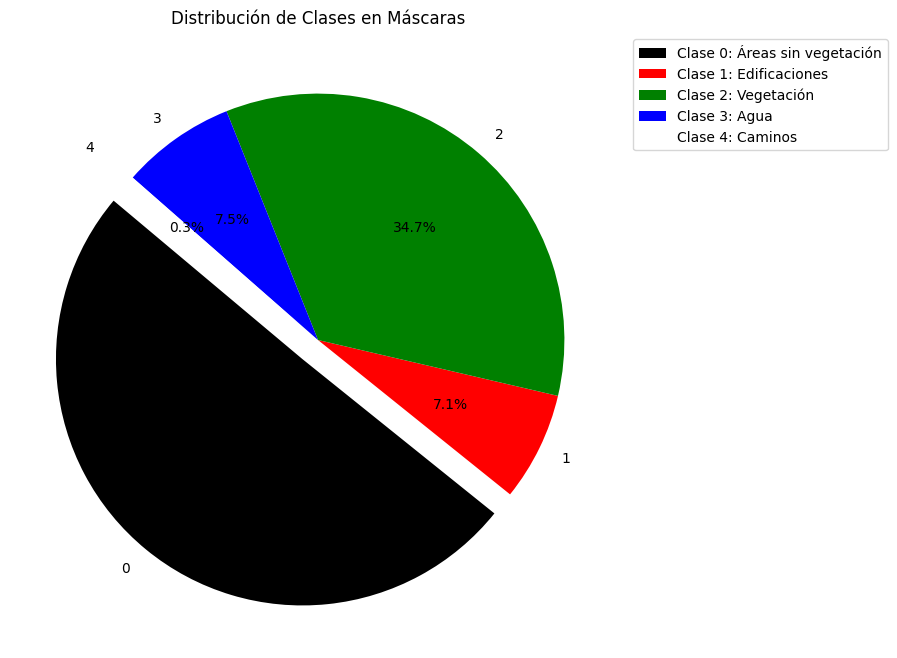

In [4]:
import matplotlib.pyplot as plt

# Graficar los porcentajes de cada clase en un gráfico de pastel
labels = value_percentages.keys()
sizes = value_percentages.values()
colors = ['black', 'red', 'green', 'blue', 'white']
explode = [0.1 if k == most_common_class or k == least_common_class else 0 for k in labels]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribución de Clases en Máscaras')

# Agregar leyenda
class_labels = ['Clase 0: Áreas sin vegetación', 'Clase 1: Edificaciones', 'Clase 2: Vegetación', 'Clase 3: Agua', 'Clase 4: Caminos']
plt.legend(class_labels, loc="best", bbox_to_anchor=(1, 1))

plt.show()

MemoryError: Unable to allocate 454. MiB for an array with shape (59476087,) and data type int64

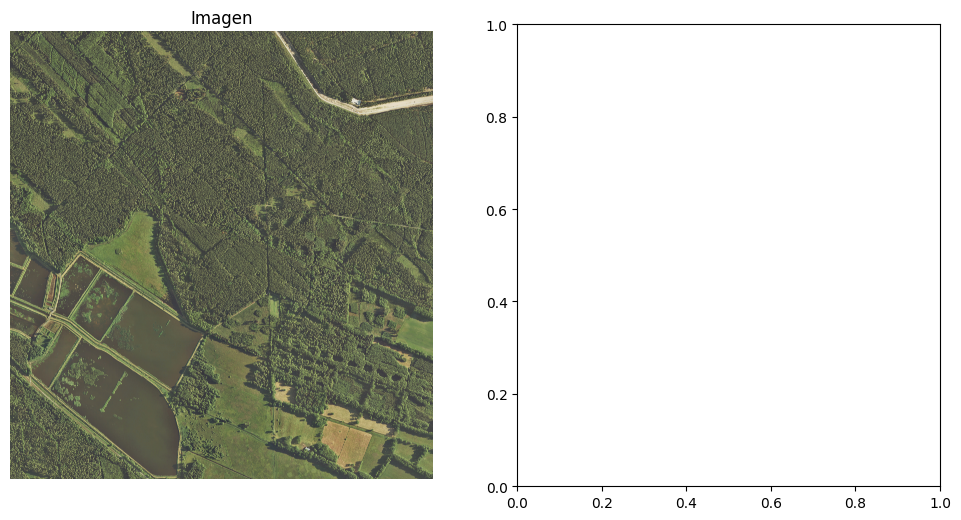

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Función para cargar una imagen y su máscara
def load_image_and_mask(image_path, mask_path):
    image = Image.open(image_path).convert('RGB')
    mask = Image.open(mask_path).convert('L')
    return np.array(image), np.array(mask)

# Ejemplo de visualización
def visualize_image_and_mask(image, mask, num_classes):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(image)
    ax[0].set_title('Imagen')
    ax[0].axis('off')

    # Definir colores para las clases
    colors = [[0, 0, 0], # Negro, probablemente areas con poca vegetación o sin
            [255, 0, 0], # Rojo, probablemente para edificaciones
            [0, 255, 0], # Verde, probablemente para vegetación
            [0, 0, 255], # Azul, probablemente agua
            [255, 255, 255]] # Blanco, probablemente caminos

    # Crear una copia de la máscara con colores para visualizar
    mask_colored = np.zeros((*mask.shape, 3), dtype=np.uint8)
    for value in range(num_classes):
        mask_colored[mask == value] = colors[value]

    ax[1].imshow(mask_colored)
    ax[1].set_title('Máscara')
    ax[1].axis('off')
    plt.show()

# Directorio que contiene las imágenes y las máscaras
images_dir = '../RGB/images/'
masks_dir = '../RGB/masks/'

# Obtener la lista de nombres de archivos de las imágenes
image_files = [file for file in os.listdir(images_dir) if file.endswith('.tif')]

# Limitar a las primeras 5 imágenes
image_files = image_files[:5]

# Ejecutar la visualización para cada par de imagen y máscara
for image_file in image_files:
    image_path = os.path.join(images_dir, image_file)
    mask_file = image_file.replace('.tif', '.tif')  
    mask_path = os.path.join(masks_dir, mask_file)
    
    # Cargar la imagen y la máscara
    image, mask = load_image_and_mask(image_path, mask_path)
    
    # Visualizar la imagen y la máscara
    visualize_image_and_mask(image, mask, num_classes=5)
